In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: V
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


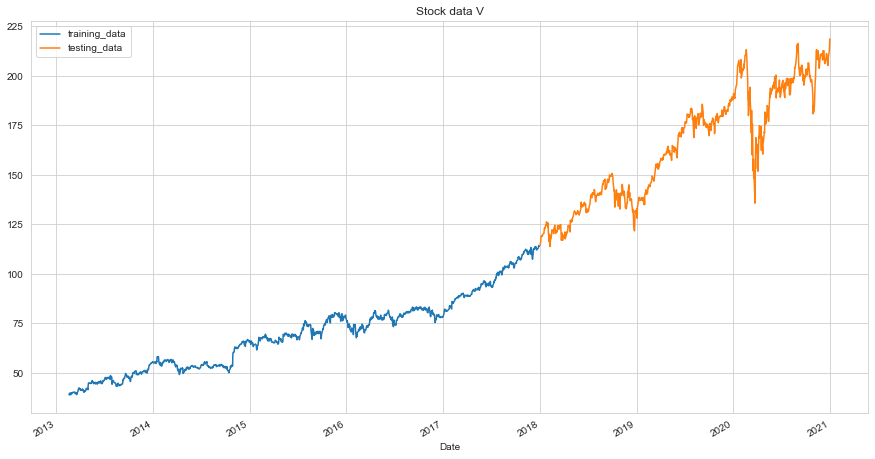

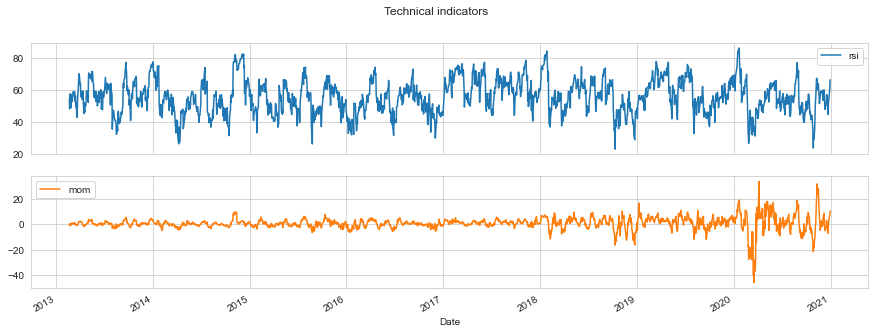

In [2]:
stock_name = 'v'.upper()
industry = 'Financial Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1504.16, duration: 0:00:00.502112
episode: 2/2000, episode end value: 1515.24, duration: 0:00:00.526122
episode: 3/2000, episode end value: 1522.63, duration: 0:00:00.461747
episode: 4/2000, episode end value: 1521.13, duration: 0:00:00.468107
episode: 5/2000, episode end value: 1521.65, duration: 0:00:00.329072
episode: 6/2000, episode end value: 1517.27, duration: 0:00:00.330195
episode: 7/2000, episode end value: 1526.11, duration: 0:00:00.340751
episode: 8/2000, episode end value: 1530.50, duration: 0:00:00.353080
episode: 9/2000, episode end value: 1514.48, duration: 0:00:00.368083
episode: 10/2000, episode end value: 1518.19, duration: 0:00:00.369084
episode: 11/2000, episode end value: 1525.12, duration: 0:00:00.347079
episode: 12/2000, episode end value: 1525.62, duration: 0:00:00.316071
episode: 13/2000, episode end value: 1515.91, duration: 0:00:00.340077
episode: 14/2000, episode end value: 1525.20, duration: 0:00:00.314070
episode: 15/200

episode: 117/2000, episode end value: 1510.48, duration: 0:00:00.413752
episode: 118/2000, episode end value: 1504.83, duration: 0:00:00.379085
episode: 119/2000, episode end value: 1506.05, duration: 0:00:00.386087
episode: 120/2000, episode end value: 1507.38, duration: 0:00:00.352080
episode: 121/2000, episode end value: 1500.36, duration: 0:00:00.451597
episode: 122/2000, episode end value: 1507.88, duration: 0:00:00.318697
episode: 123/2000, episode end value: 1511.92, duration: 0:00:00.406488
episode: 124/2000, episode end value: 1504.88, duration: 0:00:00.408094
episode: 125/2000, episode end value: 1511.90, duration: 0:00:00.370082
episode: 126/2000, episode end value: 1528.01, duration: 0:00:00.342079
episode: 127/2000, episode end value: 1511.05, duration: 0:00:00.353084
episode: 128/2000, episode end value: 1504.44, duration: 0:00:00.360079
episode: 129/2000, episode end value: 1512.15, duration: 0:00:00.381086
episode: 130/2000, episode end value: 1507.78, duration: 0:00:00

episode: 231/2000, episode end value: 1506.17, duration: 0:00:00.366083
episode: 232/2000, episode end value: 1501.25, duration: 0:00:00.387087
episode: 233/2000, episode end value: 1497.58, duration: 0:00:00.431100
episode: 234/2000, episode end value: 1496.18, duration: 0:00:00.419100
episode: 235/2000, episode end value: 1494.64, duration: 0:00:00.441093
episode: 236/2000, episode end value: 1504.92, duration: 0:00:00.412092
episode: 237/2000, episode end value: 1501.26, duration: 0:00:00.382688
episode: 238/2000, episode end value: 1498.31, duration: 0:00:00.423591
episode: 239/2000, episode end value: 1494.13, duration: 0:00:00.375085
episode: 240/2000, episode end value: 1499.67, duration: 0:00:00.370084
episode: 241/2000, episode end value: 1501.14, duration: 0:00:00.444101
episode: 242/2000, episode end value: 1502.18, duration: 0:00:00.481107
episode: 243/2000, episode end value: 1502.03, duration: 0:00:00.376086
episode: 244/2000, episode end value: 1499.97, duration: 0:00:00

episode: 345/2000, episode end value: 1501.53, duration: 0:00:00.373085
episode: 346/2000, episode end value: 1492.89, duration: 0:00:00.381090
episode: 347/2000, episode end value: 1493.52, duration: 0:00:00.393087
episode: 348/2000, episode end value: 1507.69, duration: 0:00:00.440103
episode: 349/2000, episode end value: 1503.27, duration: 0:00:00.425099
episode: 350/2000, episode end value: 1503.04, duration: 0:00:00.427098
episode: 351/2000, episode end value: 1502.27, duration: 0:00:00.428095
episode: 352/2000, episode end value: 1502.06, duration: 0:00:00.439105
episode: 353/2000, episode end value: 1504.56, duration: 0:00:00.486109
episode: 354/2000, episode end value: 1505.04, duration: 0:00:00.400090
episode: 355/2000, episode end value: 1503.67, duration: 0:00:00.435102
episode: 356/2000, episode end value: 1504.23, duration: 0:00:00.425100
episode: 357/2000, episode end value: 1505.04, duration: 0:00:00.442098
episode: 358/2000, episode end value: 1503.48, duration: 0:00:00

episode: 459/2000, episode end value: 1502.15, duration: 0:00:00.467108
episode: 460/2000, episode end value: 1502.03, duration: 0:00:00.420091
episode: 461/2000, episode end value: 1492.71, duration: 0:00:00.459102
episode: 462/2000, episode end value: 1501.59, duration: 0:00:00.412092
episode: 463/2000, episode end value: 1503.26, duration: 0:00:00.474108
episode: 464/2000, episode end value: 1498.01, duration: 0:00:00.478112
episode: 465/2000, episode end value: 1498.04, duration: 0:00:00.502114
episode: 466/2000, episode end value: 1487.52, duration: 0:00:00.414681
episode: 467/2000, episode end value: 1498.82, duration: 0:00:00.490002
episode: 468/2000, episode end value: 1505.26, duration: 0:00:00.523451
episode: 469/2000, episode end value: 1499.02, duration: 0:00:00.409094
episode: 470/2000, episode end value: 1494.35, duration: 0:00:00.398089
episode: 471/2000, episode end value: 1496.65, duration: 0:00:00.456104
episode: 472/2000, episode end value: 1500.96, duration: 0:00:00

episode: 573/2000, episode end value: 1501.51, duration: 0:00:00.540122
episode: 574/2000, episode end value: 1498.21, duration: 0:00:00.487112
episode: 575/2000, episode end value: 1501.75, duration: 0:00:00.468104
episode: 576/2000, episode end value: 1493.30, duration: 0:00:00.444097
episode: 577/2000, episode end value: 1499.04, duration: 0:00:00.459107
episode: 578/2000, episode end value: 1497.31, duration: 0:00:00.440098
episode: 579/2000, episode end value: 1496.36, duration: 0:00:00.476112
episode: 580/2000, episode end value: 1498.97, duration: 0:00:00.464106
episode: 581/2000, episode end value: 1506.43, duration: 0:00:00.479110
episode: 582/2000, episode end value: 1505.96, duration: 0:00:00.409090
episode: 583/2000, episode end value: 1498.46, duration: 0:00:00.445101
episode: 584/2000, episode end value: 1504.94, duration: 0:00:00.414092
episode: 585/2000, episode end value: 1497.76, duration: 0:00:00.408093
episode: 586/2000, episode end value: 1504.38, duration: 0:00:00

episode: 687/2000, episode end value: 1503.90, duration: 0:00:00.465106
episode: 688/2000, episode end value: 1501.41, duration: 0:00:00.464102
episode: 689/2000, episode end value: 1505.69, duration: 0:00:00.464106
episode: 690/2000, episode end value: 1498.39, duration: 0:00:00.386086
episode: 691/2000, episode end value: 1495.29, duration: 0:00:00.442103
episode: 692/2000, episode end value: 1505.01, duration: 0:00:00.499110
episode: 693/2000, episode end value: 1494.47, duration: 0:00:00.422096
episode: 694/2000, episode end value: 1505.90, duration: 0:00:00.462110
episode: 695/2000, episode end value: 1502.82, duration: 0:00:00.480104
episode: 696/2000, episode end value: 1500.53, duration: 0:00:00.422095
episode: 697/2000, episode end value: 1497.54, duration: 0:00:00.434102
episode: 698/2000, episode end value: 1505.37, duration: 0:00:00.432096
episode: 699/2000, episode end value: 1497.42, duration: 0:00:00.449102
episode: 700/2000, episode end value: 1498.97, duration: 0:00:00

episode: 801/2000, episode end value: 1499.71, duration: 0:00:00.386086
episode: 802/2000, episode end value: 1503.12, duration: 0:00:00.442106
episode: 803/2000, episode end value: 1500.04, duration: 0:00:00.463108
episode: 804/2000, episode end value: 1495.07, duration: 0:00:00.452103
episode: 805/2000, episode end value: 1503.84, duration: 0:00:00.441100
episode: 806/2000, episode end value: 1499.34, duration: 0:00:00.414097
episode: 807/2000, episode end value: 1500.35, duration: 0:00:00.452103
episode: 808/2000, episode end value: 1500.61, duration: 0:00:00.440100
episode: 809/2000, episode end value: 1500.98, duration: 0:00:00.468109
episode: 810/2000, episode end value: 1498.75, duration: 0:00:00.467112
episode: 811/2000, episode end value: 1492.58, duration: 0:00:00.394088
episode: 812/2000, episode end value: 1505.99, duration: 0:00:00.449102
episode: 813/2000, episode end value: 1501.75, duration: 0:00:00.454104
episode: 814/2000, episode end value: 1502.99, duration: 0:00:00

episode: 915/2000, episode end value: 1505.16, duration: 0:00:00.524120
episode: 916/2000, episode end value: 1501.08, duration: 0:00:00.432097
episode: 917/2000, episode end value: 1495.15, duration: 0:00:00.462103
episode: 918/2000, episode end value: 1500.56, duration: 0:00:00.495112
episode: 919/2000, episode end value: 1505.57, duration: 0:00:00.434098
episode: 920/2000, episode end value: 1500.75, duration: 0:00:00.451103
episode: 921/2000, episode end value: 1503.15, duration: 0:00:00.429094
episode: 922/2000, episode end value: 1501.33, duration: 0:00:00.445099
episode: 923/2000, episode end value: 1503.01, duration: 0:00:00.471946
episode: 924/2000, episode end value: 1500.68, duration: 0:00:00.405829
episode: 925/2000, episode end value: 1500.83, duration: 0:00:00.443100
episode: 926/2000, episode end value: 1494.83, duration: 0:00:00.483113
episode: 927/2000, episode end value: 1504.37, duration: 0:00:00.478110
episode: 928/2000, episode end value: 1502.81, duration: 0:00:00

episode: 1029/2000, episode end value: 1500.08, duration: 0:00:00.461105
episode: 1030/2000, episode end value: 1495.53, duration: 0:00:00.482109
episode: 1031/2000, episode end value: 1501.10, duration: 0:00:00.463104
episode: 1032/2000, episode end value: 1508.51, duration: 0:00:00.478110
episode: 1033/2000, episode end value: 1501.51, duration: 0:00:00.515825
episode: 1034/2000, episode end value: 1502.98, duration: 0:00:00.453894
episode: 1035/2000, episode end value: 1501.07, duration: 0:00:00.416097
episode: 1036/2000, episode end value: 1494.17, duration: 0:00:00.460101
episode: 1037/2000, episode end value: 1505.38, duration: 0:00:00.499311
episode: 1038/2000, episode end value: 1506.68, duration: 0:00:00.491819
episode: 1039/2000, episode end value: 1496.03, duration: 0:00:00.405576
episode: 1040/2000, episode end value: 1503.52, duration: 0:00:00.479111
episode: 1041/2000, episode end value: 1506.52, duration: 0:00:00.451107
episode: 1042/2000, episode end value: 1501.97, dur

episode: 1142/2000, episode end value: 1506.74, duration: 0:00:00.470105
episode: 1143/2000, episode end value: 1498.84, duration: 0:00:00.451102
episode: 1144/2000, episode end value: 1502.02, duration: 0:00:00.410097
episode: 1145/2000, episode end value: 1502.90, duration: 0:00:00.459096
episode: 1146/2000, episode end value: 1504.35, duration: 0:00:00.497113
episode: 1147/2000, episode end value: 1499.94, duration: 0:00:00.419094
episode: 1148/2000, episode end value: 1500.30, duration: 0:00:00.425101
episode: 1149/2000, episode end value: 1503.98, duration: 0:00:00.457071
episode: 1150/2000, episode end value: 1503.86, duration: 0:00:00.545975
episode: 1151/2000, episode end value: 1505.43, duration: 0:00:00.486644
episode: 1152/2000, episode end value: 1496.38, duration: 0:00:00.448033
episode: 1153/2000, episode end value: 1502.65, duration: 0:00:00.477108
episode: 1154/2000, episode end value: 1499.34, duration: 0:00:00.472114
episode: 1155/2000, episode end value: 1500.02, dur

episode: 1255/2000, episode end value: 1503.05, duration: 0:00:00.431098
episode: 1256/2000, episode end value: 1501.41, duration: 0:00:00.446100
episode: 1257/2000, episode end value: 1502.50, duration: 0:00:00.468107
episode: 1258/2000, episode end value: 1491.34, duration: 0:00:00.398089
episode: 1259/2000, episode end value: 1503.79, duration: 0:00:00.479107
episode: 1260/2000, episode end value: 1492.32, duration: 0:00:00.486110
episode: 1261/2000, episode end value: 1501.02, duration: 0:00:00.433099
episode: 1262/2000, episode end value: 1500.76, duration: 0:00:00.429099
episode: 1263/2000, episode end value: 1500.96, duration: 0:00:00.412093
episode: 1264/2000, episode end value: 1502.22, duration: 0:00:00.451694
episode: 1265/2000, episode end value: 1505.85, duration: 0:00:00.418092
episode: 1266/2000, episode end value: 1499.78, duration: 0:00:00.521118
episode: 1267/2000, episode end value: 1499.07, duration: 0:00:00.454103
episode: 1268/2000, episode end value: 1503.99, dur

episode: 1368/2000, episode end value: 1499.65, duration: 0:00:00.485109
episode: 1369/2000, episode end value: 1503.32, duration: 0:00:00.499112
episode: 1370/2000, episode end value: 1498.17, duration: 0:00:00.513119
episode: 1371/2000, episode end value: 1502.54, duration: 0:00:00.419094
episode: 1372/2000, episode end value: 1491.99, duration: 0:00:00.475107
episode: 1373/2000, episode end value: 1506.08, duration: 0:00:00.469110
episode: 1374/2000, episode end value: 1504.05, duration: 0:00:00.480105
episode: 1375/2000, episode end value: 1498.56, duration: 0:00:00.446100
episode: 1376/2000, episode end value: 1502.62, duration: 0:00:00.496012
episode: 1377/2000, episode end value: 1495.77, duration: 0:00:00.462616
episode: 1378/2000, episode end value: 1504.77, duration: 0:00:00.517192
episode: 1379/2000, episode end value: 1498.74, duration: 0:00:00.553120
episode: 1380/2000, episode end value: 1504.30, duration: 0:00:00.465105
episode: 1381/2000, episode end value: 1504.62, dur

episode: 1481/2000, episode end value: 1500.89, duration: 0:00:00.515119
episode: 1482/2000, episode end value: 1504.77, duration: 0:00:00.508113
episode: 1483/2000, episode end value: 1499.39, duration: 0:00:00.454107
episode: 1484/2000, episode end value: 1493.31, duration: 0:00:00.485113
episode: 1485/2000, episode end value: 1500.91, duration: 0:00:00.479110
episode: 1486/2000, episode end value: 1503.37, duration: 0:00:00.442100
episode: 1487/2000, episode end value: 1499.69, duration: 0:00:00.393093
episode: 1488/2000, episode end value: 1496.80, duration: 0:00:00.433096
episode: 1489/2000, episode end value: 1507.76, duration: 0:00:00.414092
episode: 1490/2000, episode end value: 1501.89, duration: 0:00:00.484111
episode: 1491/2000, episode end value: 1502.13, duration: 0:00:00.469107
episode: 1492/2000, episode end value: 1503.29, duration: 0:00:00.457100
episode: 1493/2000, episode end value: 1502.09, duration: 0:00:00.474113
episode: 1494/2000, episode end value: 1497.10, dur

episode: 1594/2000, episode end value: 1503.06, duration: 0:00:00.446094
episode: 1595/2000, episode end value: 1496.47, duration: 0:00:00.419096
episode: 1596/2000, episode end value: 1503.38, duration: 0:00:00.484108
episode: 1597/2000, episode end value: 1500.18, duration: 0:00:00.473107
episode: 1598/2000, episode end value: 1505.72, duration: 0:00:00.474105
episode: 1599/2000, episode end value: 1499.63, duration: 0:00:00.457103
episode: 1600/2000, episode end value: 1498.55, duration: 0:00:00.484107
episode: 1601/2000, episode end value: 1501.29, duration: 0:00:00.520118
episode: 1602/2000, episode end value: 1502.46, duration: 0:00:00.486108
episode: 1603/2000, episode end value: 1498.96, duration: 0:00:00.486110
episode: 1604/2000, episode end value: 1504.55, duration: 0:00:00.482108
episode: 1605/2000, episode end value: 1508.98, duration: 0:00:00.410092
episode: 1606/2000, episode end value: 1500.46, duration: 0:00:00.396089
episode: 1607/2000, episode end value: 1498.29, dur

episode: 1707/2000, episode end value: 1501.59, duration: 0:00:00.338072
episode: 1708/2000, episode end value: 1490.59, duration: 0:00:00.338078
episode: 1709/2000, episode end value: 1504.36, duration: 0:00:00.327073
episode: 1710/2000, episode end value: 1502.66, duration: 0:00:00.305065
episode: 1711/2000, episode end value: 1502.41, duration: 0:00:00.342573
episode: 1712/2000, episode end value: 1502.70, duration: 0:00:00.321108
episode: 1713/2000, episode end value: 1495.57, duration: 0:00:00.348241
episode: 1714/2000, episode end value: 1504.43, duration: 0:00:00.336076
episode: 1715/2000, episode end value: 1500.33, duration: 0:00:00.367083
episode: 1716/2000, episode end value: 1502.30, duration: 0:00:00.390090
episode: 1717/2000, episode end value: 1503.44, duration: 0:00:00.356080
episode: 1718/2000, episode end value: 1502.60, duration: 0:00:00.364083
episode: 1719/2000, episode end value: 1499.23, duration: 0:00:00.306069
episode: 1720/2000, episode end value: 1495.46, dur

episode: 1820/2000, episode end value: 1499.48, duration: 0:00:00.295069
episode: 1821/2000, episode end value: 1502.41, duration: 0:00:00.277061
episode: 1822/2000, episode end value: 1499.36, duration: 0:00:00.295067
episode: 1823/2000, episode end value: 1499.09, duration: 0:00:00.268059
episode: 1824/2000, episode end value: 1503.71, duration: 0:00:00.283064
episode: 1825/2000, episode end value: 1497.44, duration: 0:00:00.291069
episode: 1826/2000, episode end value: 1473.93, duration: 0:00:00.295066
episode: 1827/2000, episode end value: 1501.15, duration: 0:00:00.301069
episode: 1828/2000, episode end value: 1504.70, duration: 0:00:00.293063
episode: 1829/2000, episode end value: 1502.83, duration: 0:00:00.275060
episode: 1830/2000, episode end value: 1501.14, duration: 0:00:00.261058
episode: 1831/2000, episode end value: 1501.75, duration: 0:00:00.257054
episode: 1832/2000, episode end value: 1506.52, duration: 0:00:00.275067
episode: 1833/2000, episode end value: 1502.98, dur

episode: 1933/2000, episode end value: 1496.44, duration: 0:00:00.243056
episode: 1934/2000, episode end value: 1502.14, duration: 0:00:00.256076
episode: 1935/2000, episode end value: 1500.82, duration: 0:00:00.263042
episode: 1936/2000, episode end value: 1500.14, duration: 0:00:00.255057
episode: 1937/2000, episode end value: 1501.24, duration: 0:00:00.242055
episode: 1938/2000, episode end value: 1468.35, duration: 0:00:00.231053
episode: 1939/2000, episode end value: 1505.77, duration: 0:00:00.246048
episode: 1940/2000, episode end value: 1503.66, duration: 0:00:00.250055
episode: 1941/2000, episode end value: 1499.69, duration: 0:00:00.245072
episode: 1942/2000, episode end value: 1499.29, duration: 0:00:00.234038
episode: 1943/2000, episode end value: 1499.87, duration: 0:00:00.248056
episode: 1944/2000, episode end value: 1499.53, duration: 0:00:00.233055
episode: 1945/2000, episode end value: 1498.88, duration: 0:00:00.236050
episode: 1946/2000, episode end value: 1497.51, dur

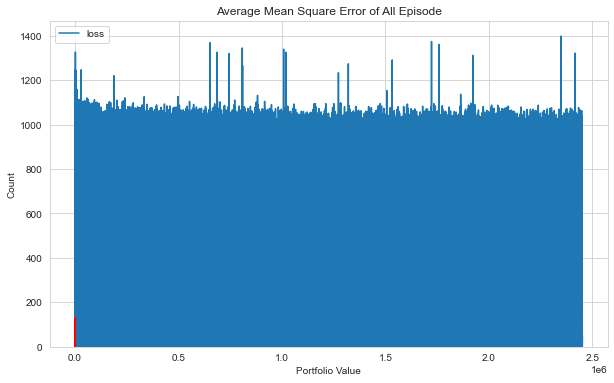

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

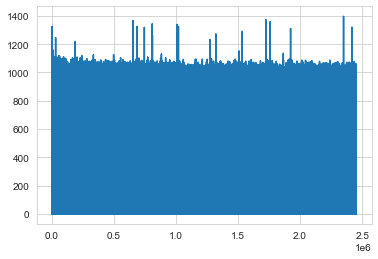

In [5]:
plt.plot(agent.model.losses)

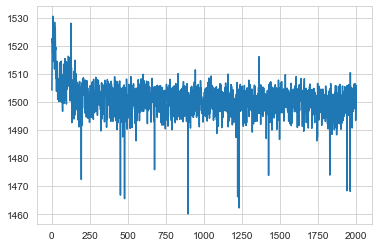

In [6]:
plt.plot(portfolio_value)

episode end value: 1372.32, duration: 0:00:00.110994
Sell: 400 times, Buy: 301 times


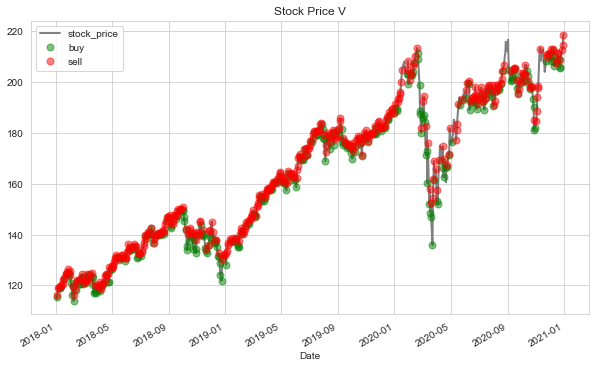

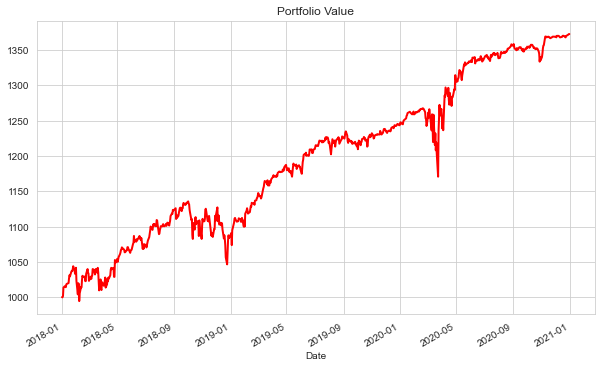

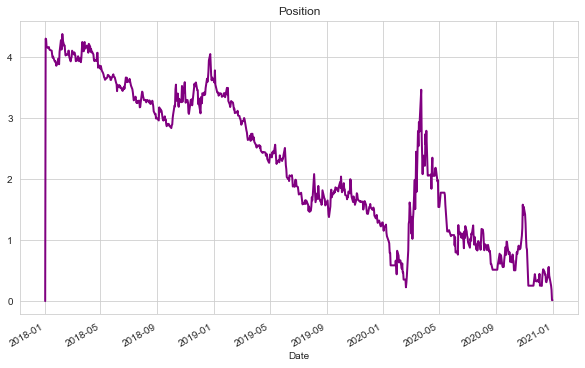

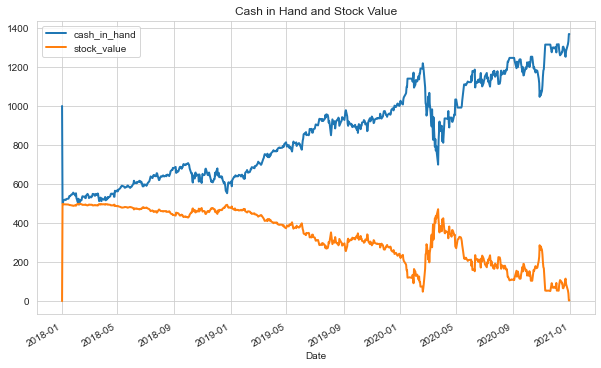

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: V
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 11.13 %
Volatility: 0.0985
shape ratio: 1.0176
Maximun drawdown: -7.84 %
Calmar ratio: 1.4192
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 24.08 %
Volatility (benchmark): 0.3049
shape ratio: 0.7536
Maximun drawdown: -36.36 %
Calmar ratio (benchmark): 0.6621


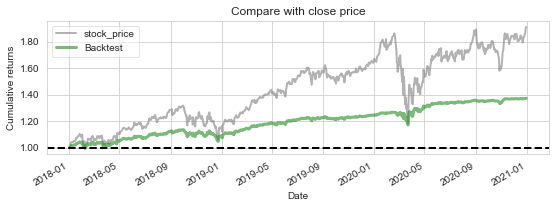

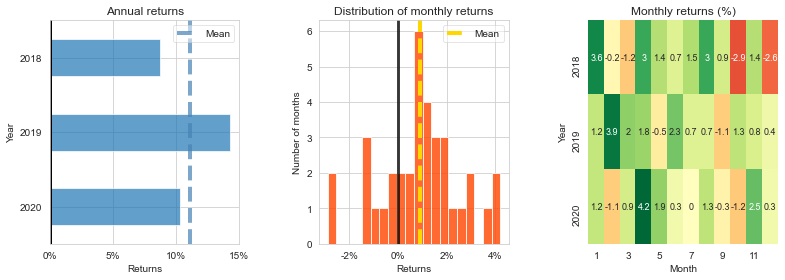

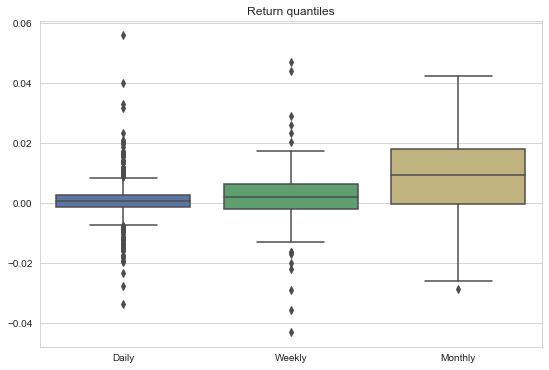

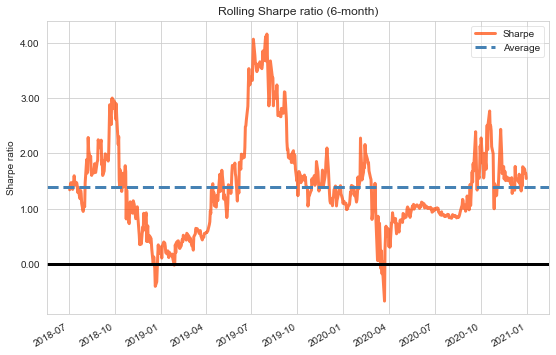

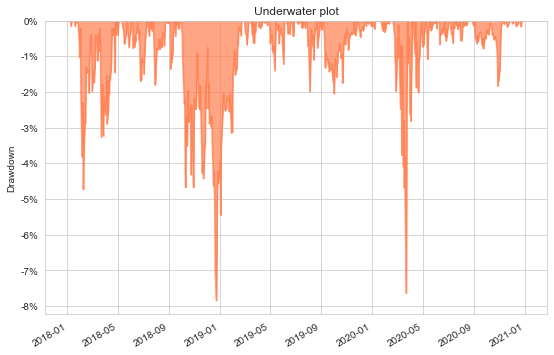

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')